# IMPORT THE LIBRARIES:

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


# DESCRIBING THE DATA SET :
                 

|FEATURE NAME| |DESCRIPTION|
|------------| |-----------|
|COUNTRY| | Data of 193 countries|
|YEAR| |Data set is taken for the year 2000-2015|
|STATUS| | It defines whether the country is developed or developing|
|LIFE EXPECTANCY| | Expectancy of life in age|
|ADULT MORTALITY| |Probability of deaths between age (15-60) per 1000 population of both gender|
|INFANTS DEATHS| | Deaths per 1000 population of age (0-1)|
|ALCOHOL| |Record per capita (for each person above the age 15) whose consumption is in litres|
|PERCENTAGE EXPENDITURE| |Expenditure on health in % of GDP per capita(%)|
|HEPATITIS B| |Percentage of immunization coverage among 1 year old|
|MEASLES| |Number of reported cases per 1000 population|
|BMI| |Average body mass index of entire population|
|CHILD MORTALITY| |Number of deaths of age group(4-5) per 1000 population|
|POLIO| |Percentage of immunization coverage in 1 year|
|TOTAL EXPENDITURE| |Percentage of government expenditure used on health of total expenditure|
|DIPHTHERIA| |Percentage of immunization coverage among 1 year old|
|HIV/AIDS| |Death per 1000 births of age group(0-4) in years|
|GDP| | Gross domestic product (in USD)|
|POPULATION| |Number of people residing in a country|
|THINNESS(10-19),(5-9) YEARS| |Percentage of prevalence of thinness among children of age (10-19),(5-9)in years|
|INCOME COMPOSITION OF RESOURCES| |index range in 0-1|
|SCHOOLING| | Number of years of schooling|

In [417]:
df=pd.read_csv('Life Expectancy Data.csv')
df2=pd.read_csv('csvData.csv')
pd.pandas.set_option('display.max_columns',None)


# DATA PREPROCESSING:

In [418]:
df.head(10)

Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   
5  Afghanistan  2010  Developing            279.0             74     0.01   
6  Afghanistan  2009  Developing            281.0             77     0.01   
7  Afghanistan  2008  Developing            287.0             80     0.03   
8  Afghanistan  2007  Developing            295.0             82     0.02   
9  Afghanistan  2006  Developing            295.0             84     0.03   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   
5               79.679367         66.0      1989   16.7                 102   
6               56.762217         63.0      2861   16.2                 106   
7               25.873925         64.0      1599   15.7                 110   
8               10.910156         63.0      1141   15.2                 113   
9               17.171518         64.0      1990   14.7                 116   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   
5   66.0               9.20         66.0        0.1  553.328940   2883167.0   
6   63.0               9.42         63.0        0.1  445.893298    284331.0   
7   64.0               8.33         64.0        0.1  373.361116   2729431.0   
8   63.0               6.73         63.0        0.1  369.835796  26616792.0   
9   58.0               7.43         58.0        0.1  272.563770   2589345.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   
5                   18.4                 18.4   
6                   18.6                 18.7   
7                   18.8                 18.9   
8                   19.0                 19.1   
9                   19.2                 19.3   

   Income composition of resources  Schooling  Life expectancy   
0                            0.479       10.1              65.0  
1                            0.476       10.0              59.9  
2                            0.470        9.9              59.9  
3                            0.463        9.8              59.5  
4                            0.454        9.5              59.2  
5                            0.448        9.2              58.8  
6                            0.434        8.9              58.6  
7                            0.433        8.7              58.1  
8                            0.415        8.4              57.5  
9                            0.405        8.1              57.3

In [419]:
df["Status"].value_counts()


Developing    2426
Developed      512
Name: Status, dtype: int64

In [420]:
df2.head()

country continent
0       Algeria    Africa
1        Angola    Africa
2         Benin    Africa
3      Botswana    Africa
4  Burkina Faso    Africa

In [421]:
df.shape

(2938, 22)

In [422]:
df['Country']=df['Country'].replace(to_replace=['Bolivia (Plurinational State of)','Iran (Islamic Republic of)',
                                                'Micronesia (Federated States of)','Venezuela (Bolivarian Republic of)',
                                               'Brunei Darussalam', "Côte d'Ivoire", 'Cabo Verde', 'Congo',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo',
       "Lao People's Democratic Republic", 'Republic of Korea',
       'Republic of Moldova', 'Russian Federation', 'Swaziland',
       'Syrian Arab Republic',
       'The former Yugoslav republic of Macedonia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Viet Nam'],
                     value=['Bolivia','Iran','Micronesia','Venezuela','Brunei','Ivory Coast','Cape Verde',
                            'Republic of the Congo','Czech Republic','North Korea','DR Congo','Laos','South Korea',
                            'Moldova','Russia','Eswatini','Syria','North Macedonia','United Kingdom','Tanzania',
                            'United States','Vietnam'])

In [423]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
Life expectancy                     362
dtype: int64

In [424]:
a=[]
b=[]
mydatacountry=[]
newdatacountry=[]
v=[]

for k in df2['continent']:
    a.append(k)

In [425]:

for i in df['Country']:
    mydatacountry.append(i)
    
for j in df2['country']:
    newdatacountry.append(j)
            
            
    
    
   

In [426]:
for i in range(0,len(mydatacountry)):
    for j in range(0,len(newdatacountry)):
        if mydatacountry[i].lower()==newdatacountry[j].lower():
            b.append(a[j])
        
        

In [427]:
tew=pd.DataFrame(b,columns=['Continents'])
df=pd.concat([df,tew],axis=1)
            
        

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [429]:
df.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy ', 'Continents'],
      dtype='object')

In [430]:
df.shape

(2938, 23)

# CHECKING FOR MISSING VALUES

In [431]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
Continents                           0
dtype: int64

# DATA VISUALIZATION

In [432]:
corr=df.corr()

<AxesSubplot:>

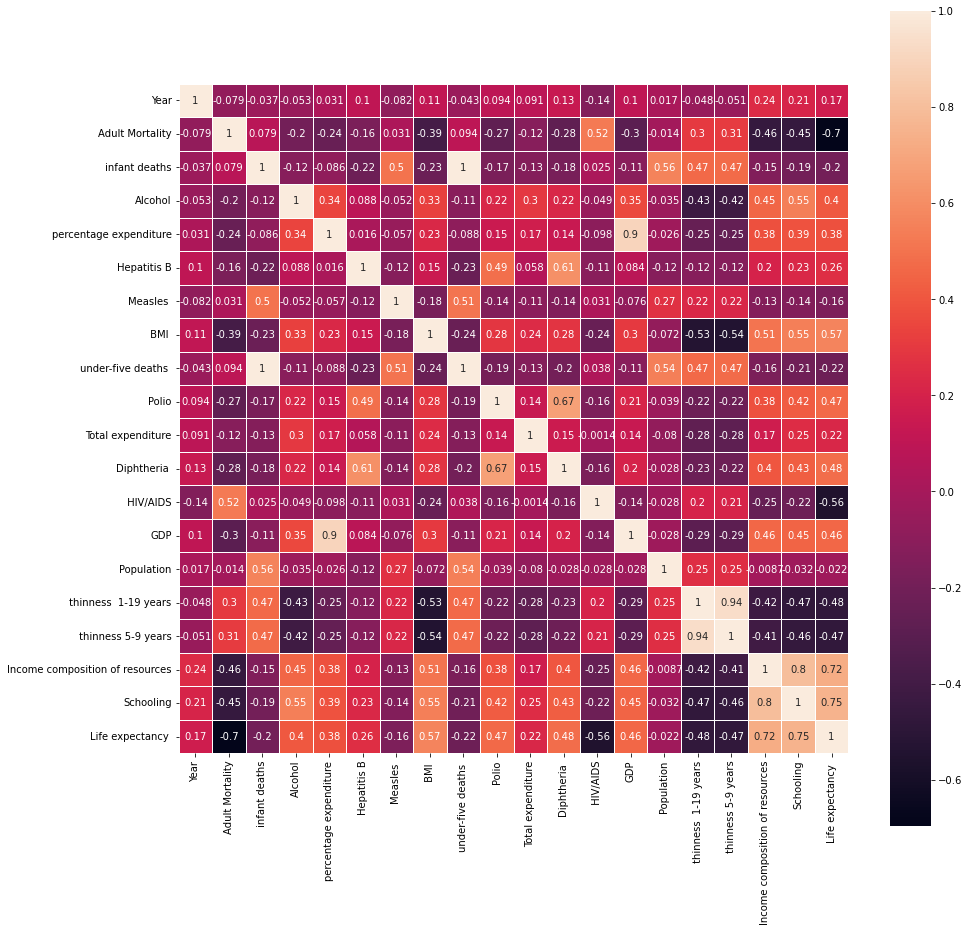

In [152]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

C:\Users\muska\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

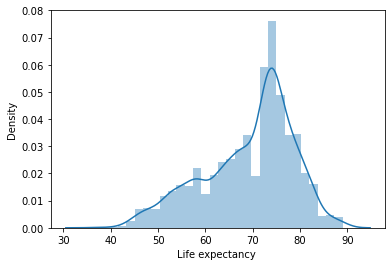

In [153]:
sns.distplot(df['Life expectancy '])


#####To see the effect of Alcohol and schooling. 

Text(0.5, 1.0, 'Life expectancy - Schooling')

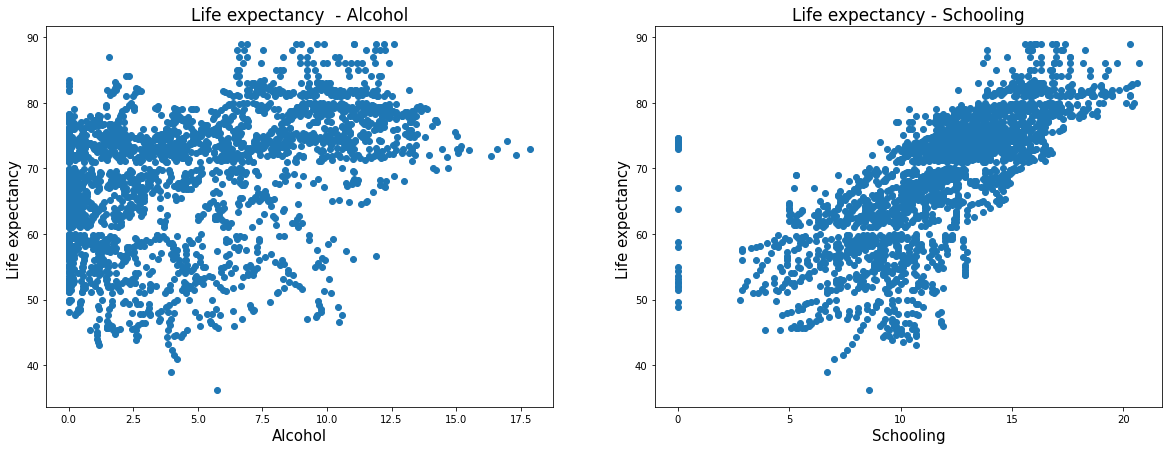

In [154]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.scatter(df["Alcohol"],df["Life expectancy "])
plt.xlabel("Alcohol",fontsize=15)
plt.ylabel("Life expectancy ",fontsize=15)
plt.title("Life expectancy  - Alcohol",fontsize=17)

plt.subplot(1, 2, 2)
plt.scatter(df["Schooling"], df['Life expectancy '])

plt.xlabel("Schooling",fontsize=15)
plt.ylabel('Life expectancy ',fontsize=15)
plt.title('Life expectancy - Schooling',fontsize=17)

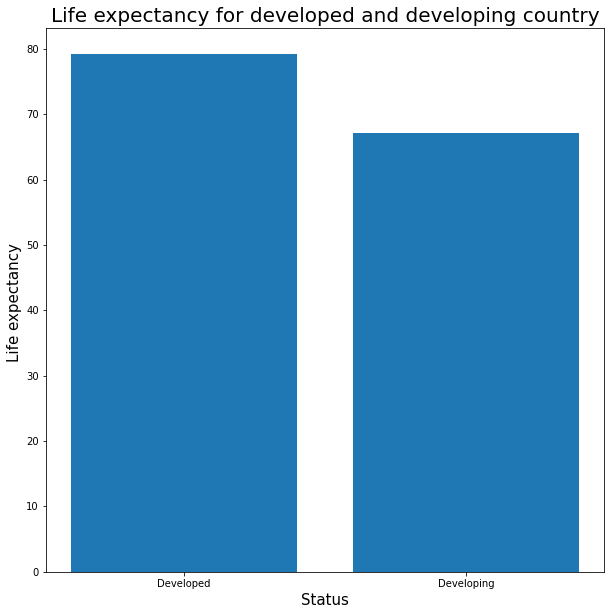

In [155]:
plt.figure(figsize=(10,10))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')["Life expectancy "].mean())
plt.xlabel("Status",fontsize=15)
plt.ylabel("Life expectancy ",fontsize=15)
plt.title("Life expectancy for developed and developing country",fontsize=20)
plt.show()

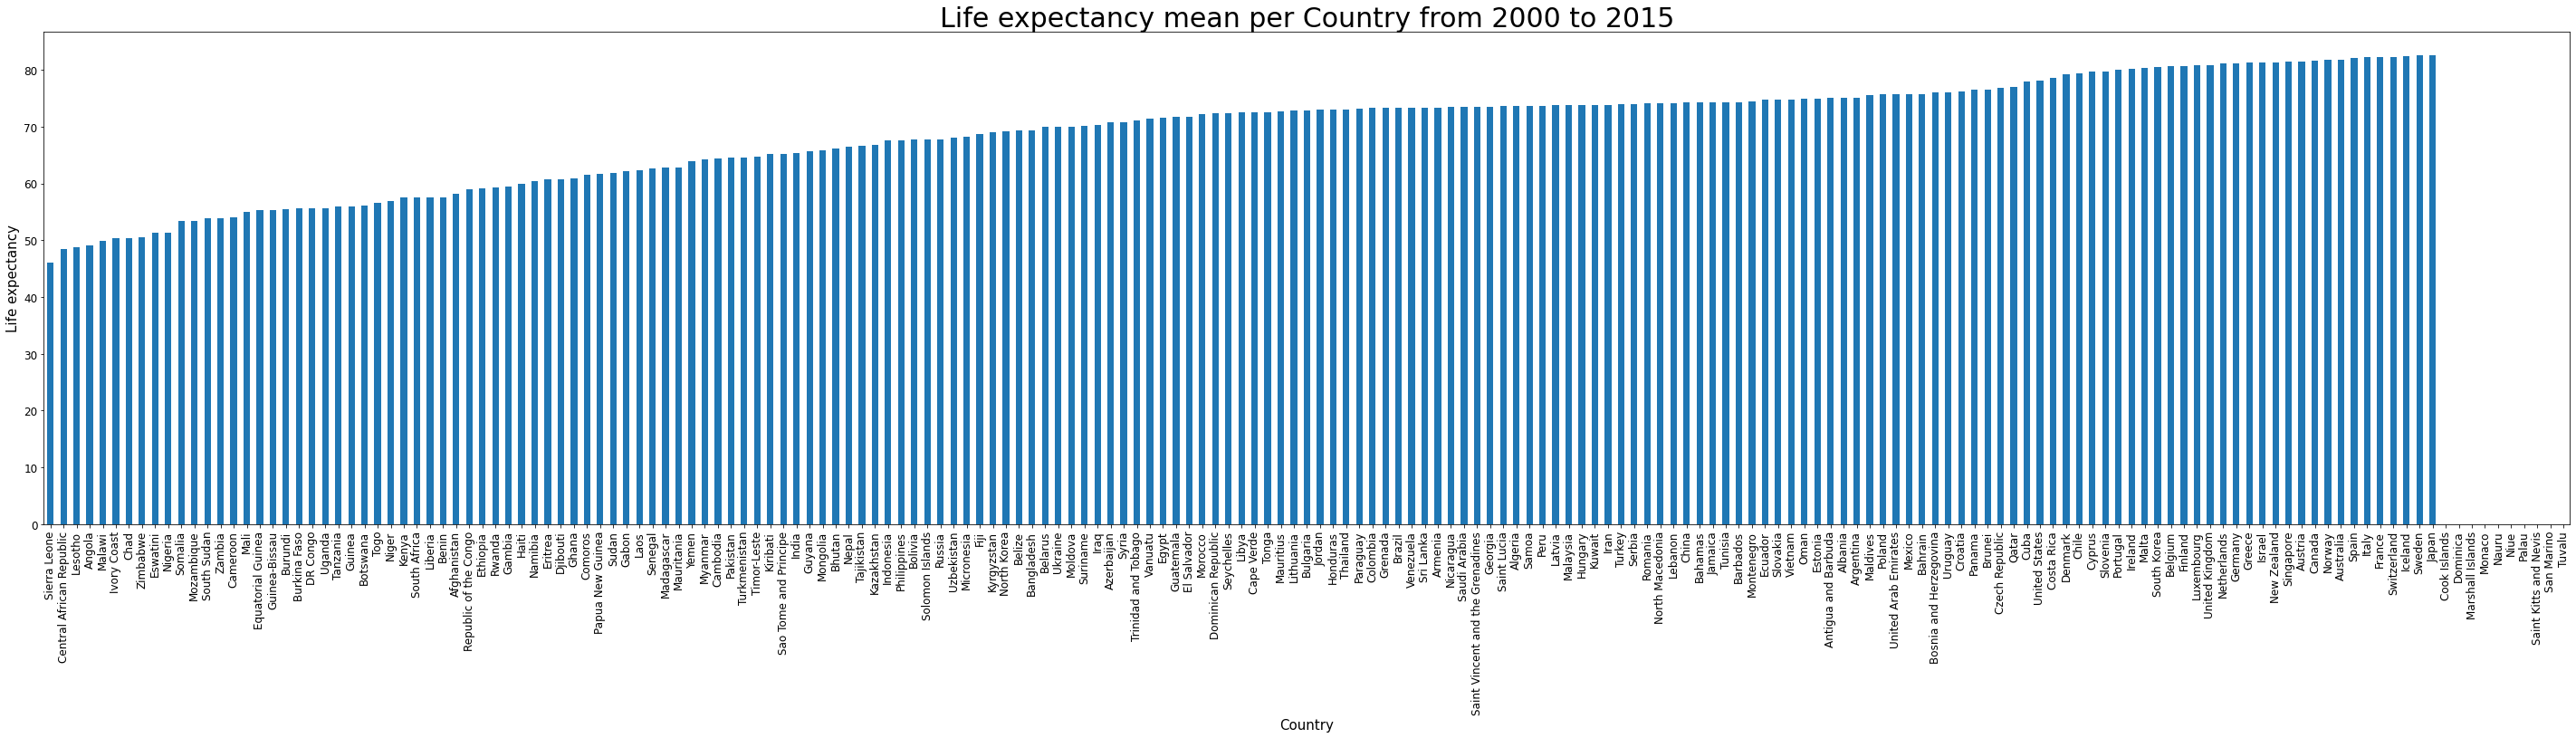

In [156]:
life_expectancy_per_country = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=True)
life_expectancy_per_country.plot(kind='bar', figsize=(50,10), fontsize=12)
plt.title("Life expectancy mean per Country from 2000 to 2015",fontsize=30)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Life expectancy",fontsize=15)
plt.show()

C:\Users\muska\AppData\Local\Temp/ipykernel_9948/1859030833.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2000=(df[df.Year==2000]


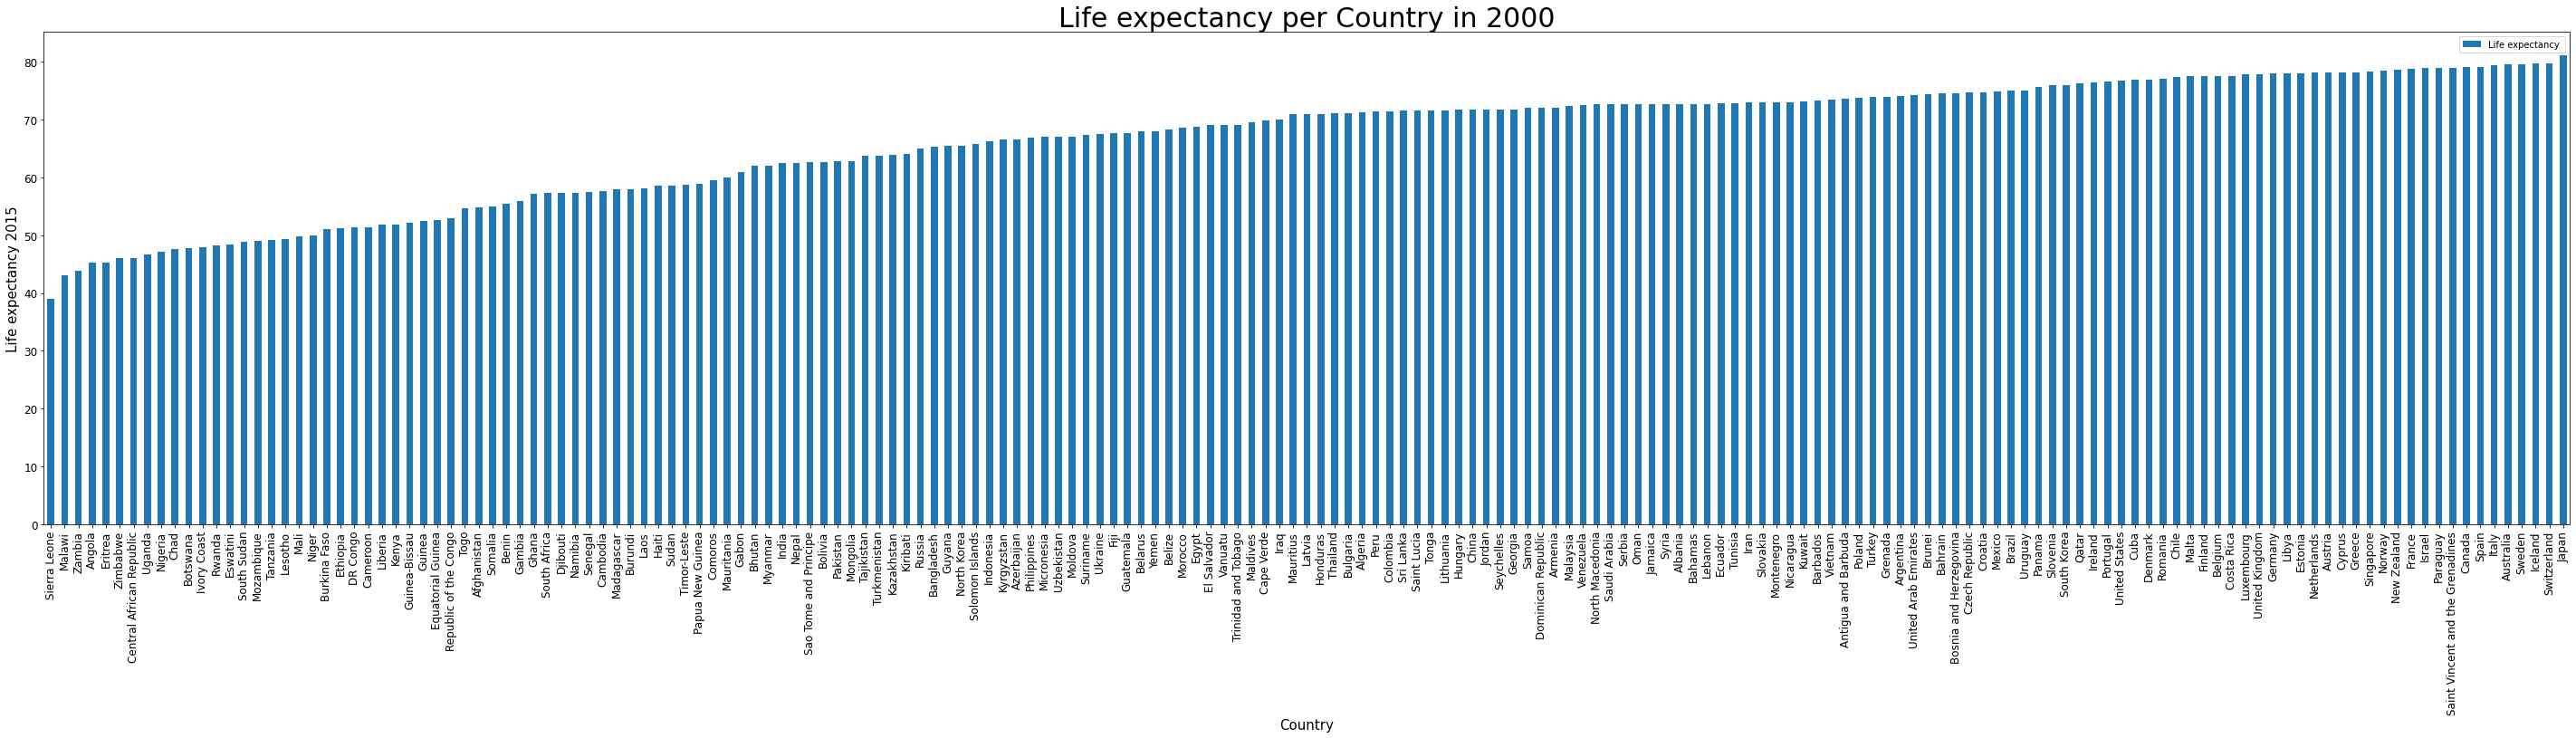

In [157]:
df_2000=(df[df.Year==2000]
    .groupby("Country")
    ["Country", "Life expectancy "]
    .median()
    .sort_values(by="Life expectancy ", ascending=True))

df_2000.plot(kind='bar', figsize=(50,10), fontsize=12)
plt.title("Life expectancy per Country in 2000",fontsize=30)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Life expectancy 2015",fontsize=15)
plt.show()

C:\Users\muska\AppData\Local\Temp/ipykernel_9948/668307647.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_india=(df[df.Country=="India"]


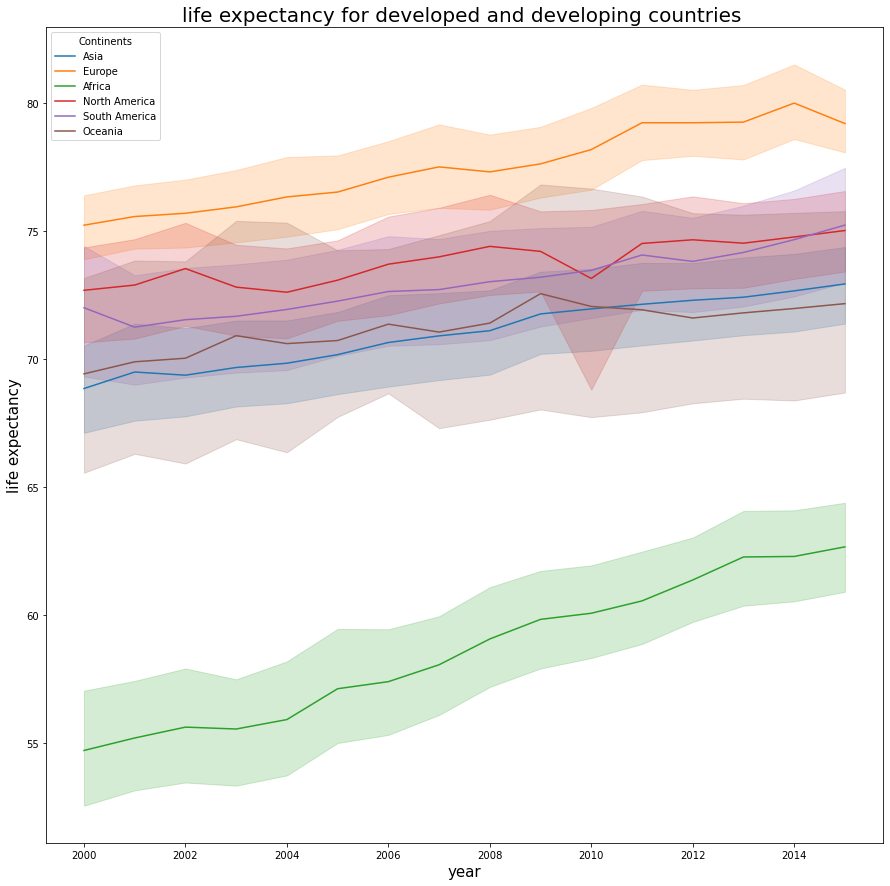

In [158]:
plt.figure(figsize=(15,15))
df_india=(df[df.Country=="India"]
    .groupby("Year")
    ["Year", "Life expectancy "] .median())
sns.lineplot(x ='Year' , y = "Life expectancy ", data = df, hue = 'Continents' ,
              dashes = False, legend="brief")
plt.title("life expectancy for developed and developing countries ", fontsize = 20)
plt.xlabel("year", fontsize = 15)
plt.ylabel("life expectancy", fontsize = 15) 
plt.show()

### Bar chart to show the relation between life expectancy of different continents

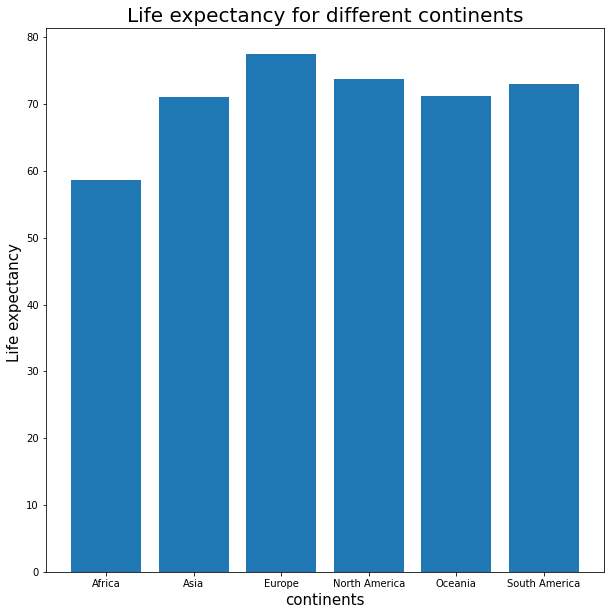

In [159]:
plt.figure(figsize=(10,10))
plt.bar(df.groupby('Continents')['Continents'].count().index,df.groupby('Continents')["Life expectancy "].mean())
plt.xlabel("continents",fontsize=15)
plt.ylabel("Life expectancy ",fontsize=15)
plt.title("Life expectancy for different continents",fontsize=20)
plt.show()

# REMOVING OUTLIERS 

In [433]:
columns = {'Year':1,'Life expectancy ':2,'Adult Mortality':3,'infant deaths':4,'Alcohol':5,'percentage expenditure':6,
            'Hepatitis B':7,'Measles ':8,' BMI ':9,'under-five deaths ':10,'Polio':11,'Total expenditure':12,'Diphtheria ':13,' HIV/AIDS':14,
            'GDP':15,'Population':16,' thinness  1-19 years':17,' thinness 5-9 years':18,'Income composition of resources':19,'Schooling':20}

C:\Users\muska\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muska\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muska\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muska\anaconda3\lib\si

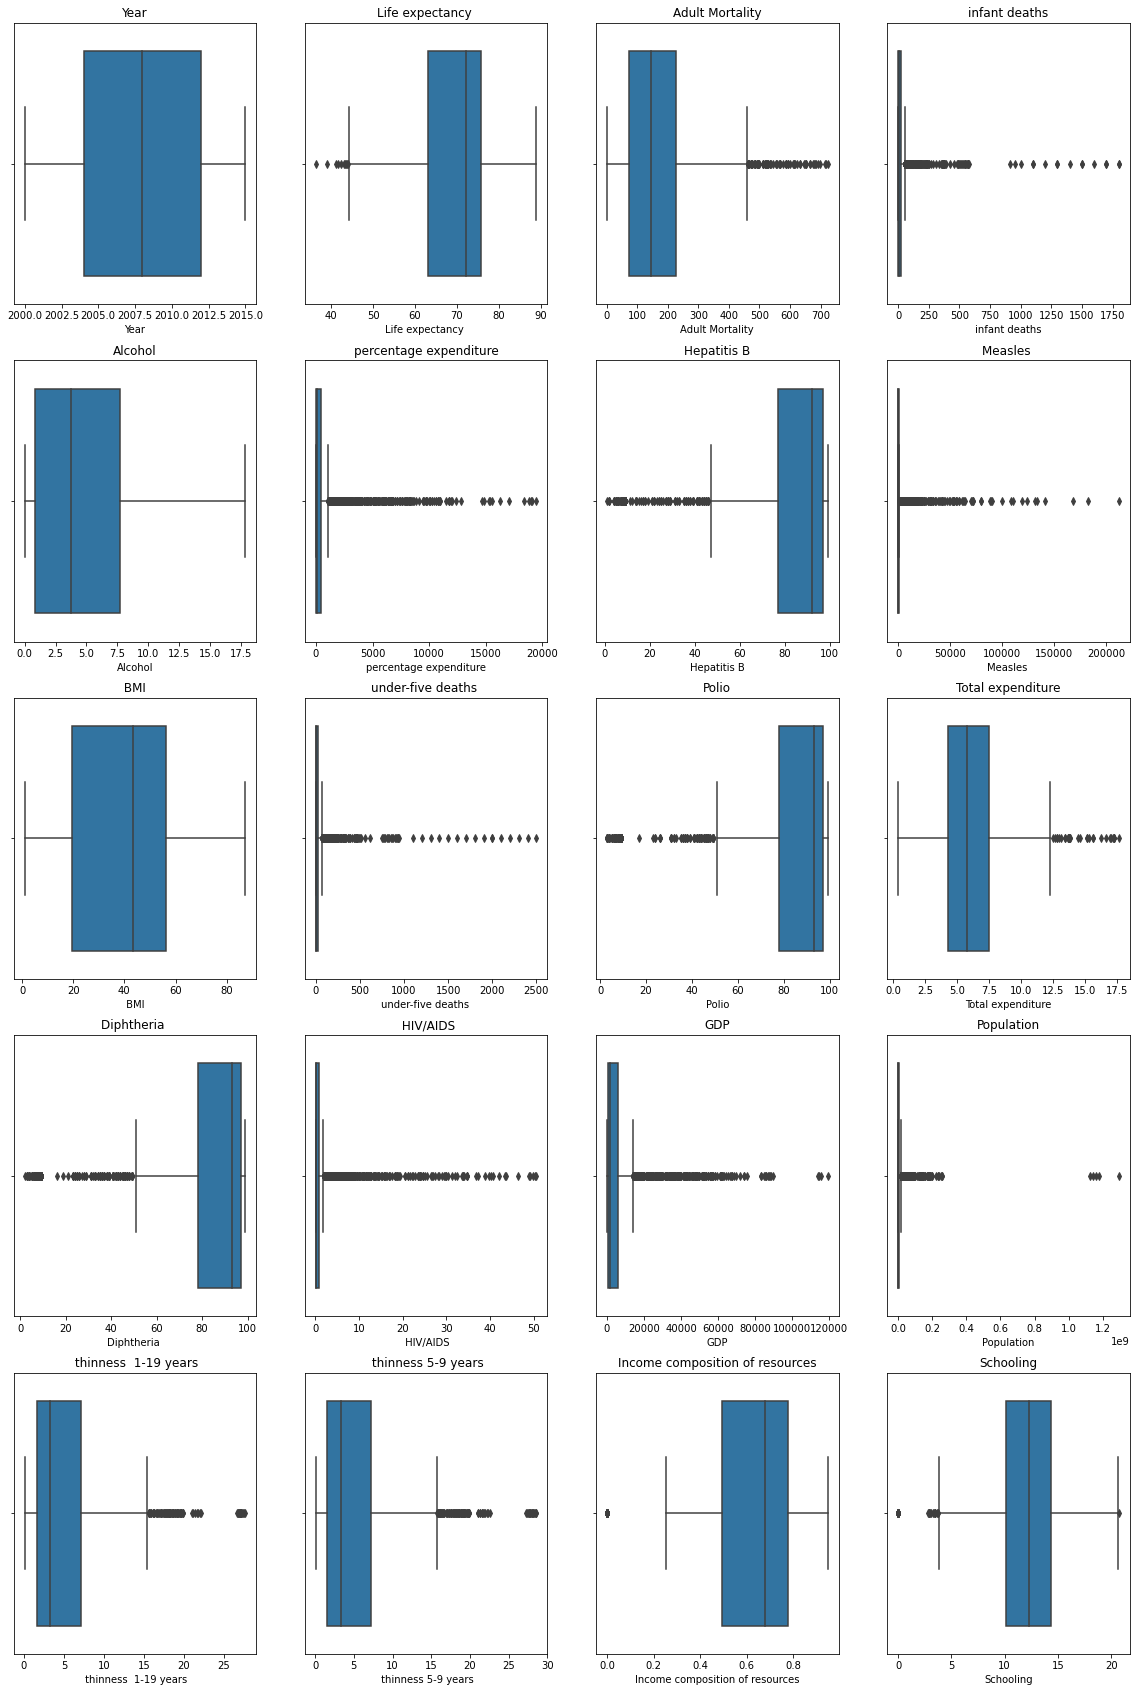

In [434]:
# BEFORE REMOVING OUTLIERS
plt.figure(figsize = (20,30))
for var, i in columns.items():
    plt.subplot(5,4,i)
    sns.boxplot(df[var], whis = 1.5)
    plt.title(var)
plt.show()

In [435]:
numeric_cols = [] 
for i in df.columns:
    if i != 'Status' and df[i].dtype in (np.float64, np.int64):
        numeric_cols.append(i)

In [436]:
 percent_low = []
percent_high = []
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (iqr*1.5)
    high = q3 + (iqr*1.5)
    count_l = len(np.where(df[col] < low)[0])
    count_h = len(np.where(df[col] > high)[0])
    percent_low.append(round(count_l/len(df[col])*100, 2))
    percent_high.append(round(count_h/len(df[col])*100, 2))
outlier_table = pd.DataFrame({'Factor':numeric_cols, 'Lower Bound %':percent_low, 'Upper Bound %':percent_high})
 outlier_table

Factor  Lower Bound %  Upper Bound %
0                              Year           0.00           0.00
1                   Adult Mortality           0.00           2.79
2                     infant deaths           0.00          10.72
3                           Alcohol           0.00           0.00
4            percentage expenditure           0.00          13.24
5                       Hepatitis B           8.65           0.00
6                          Measles            0.00          18.45
7                              BMI            0.00           0.00
8                under-five deaths            0.00          13.41
9                             Polio           9.50           0.00
10                Total expenditure           0.00           1.09
11                      Diphtheria           10.14           0.00
12                         HIV/AIDS           0.00          18.45
13                              GDP           0.00          12.42
14                       Population           0.00          10.01
15             thinness  1-19 years           0.00           3.03
16               thinness 5-9 years           0.00           3.27
17  Income composition of resources           4.42           0.00
18                        Schooling           1.46           0.03
19                 Life expectancy            0.34           0.00

In [437]:
for i,col in enumerate(numeric_cols, 1):
    df[col] = winsorize(df[col], (max(percent_low)/100, max(percent_high)/100))

C:\Users\muska\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muska\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muska\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muska\anaconda3\lib\si

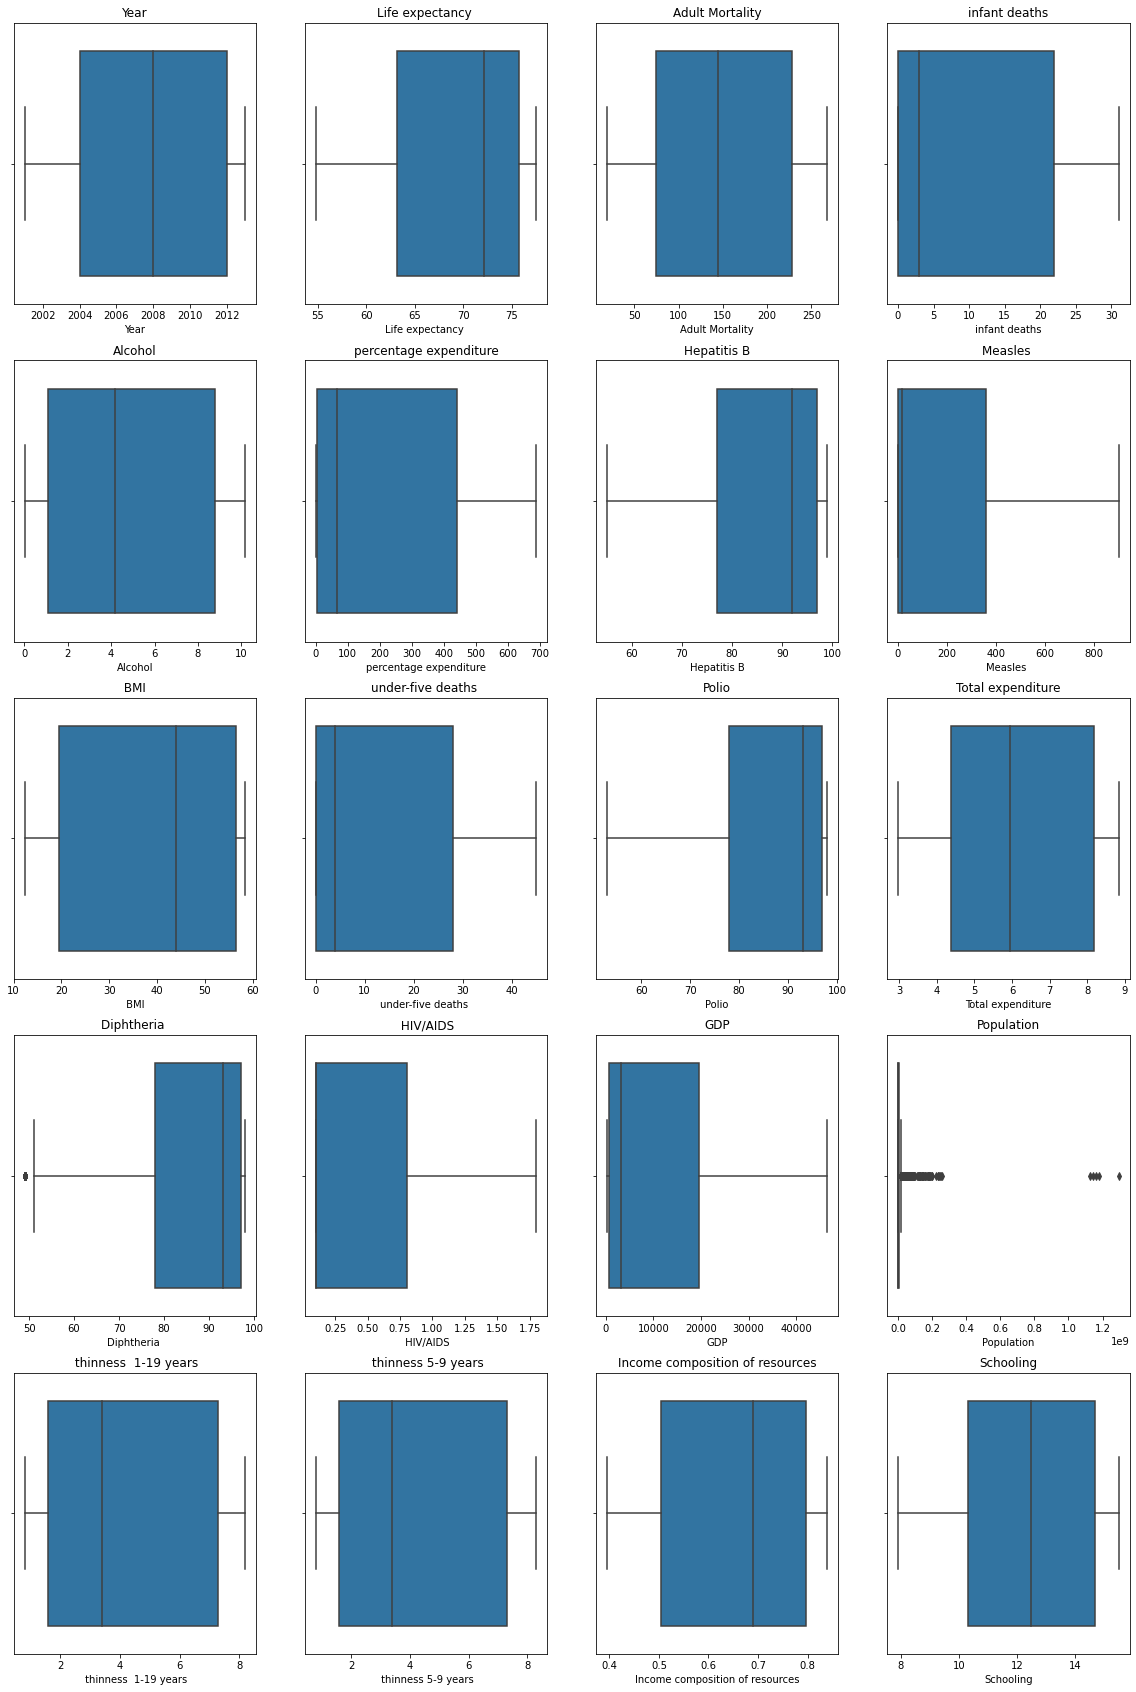

In [438]:
# After removing outliers
plt.figure(figsize = (20,30))
for var, i in columns.items():
    plt.subplot(5,4,i)
    sns.boxplot(df[var], whis = 1.5)
    plt.title(var)
plt.show()

# HANDLING MISSING VALUES

In [439]:
df.drop(['Population'], inplace = True, axis=1)

In [440]:
df.shape

(2938, 22)

In [441]:
df['Alcohol'].nunique()

846

In [442]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
Life expectancy                      0
Continents                           0
dtype: int64

In [443]:
df['Alcohol'].isnull().sum()

0

In [444]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
 missing ="{} has {} % missing values"
 print(missing.format(feature,np.round(df[feature].isnull().mean(), 4)))

Hepatitis B has 0.1882 % missing values


In [445]:
for feature in features_with_na:
    
    df[feature]=df.groupby('Country')[feature].apply(lambda x: x.fillna(x.mean()))
    df[feature]=df[feature].fillna(df[feature].mean())

In [446]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
Continents                         0
dtype: int64

# SEPERATING DEPENDENT AND INDEPENDENT VARIABLE

In [447]:
X=df.drop(['Life expectancy '],axis=1)
y=df['Life expectancy ']

In [448]:
X

Country  Year      Status  Adult Mortality  \
0                          Afghanistan  2013  Developing            263.0   
1                          Afghanistan  2013  Developing            268.0   
2                          Afghanistan  2013  Developing            268.0   
3                          Afghanistan  2012  Developing            268.0   
4                          Afghanistan  2011  Developing            268.0   
5                          Afghanistan  2010  Developing            268.0   
6                          Afghanistan  2009  Developing            268.0   
7                          Afghanistan  2008  Developing            268.0   
8                          Afghanistan  2007  Developing            268.0   
9                          Afghanistan  2006  Developing            268.0   
10                         Afghanistan  2005  Developing            268.0   
11                         Afghanistan  2004  Developing            268.0   
12                         Afghanistan  2003  Developing            268.0   
13                         Afghanistan  2002  Developing             19.0   
14                         Afghanistan  2001  Developing            268.0   
15                         Afghanistan  2001  Developing            268.0   
16                             Albania  2013  Developing             74.0   
17                             Albania  2013  Developing             19.0   
18                             Albania  2013  Developing             84.0   
19                             Albania  2012  Developing             86.0   
20                             Albania  2011  Developing             88.0   
21                             Albania  2010  Developing             91.0   
22                             Albania  2009  Developing             91.0   
23                             Albania  2008  Developing             19.0   
24                             Albania  2007  Developing             19.0   
25                             Albania  2006  Developing             99.0   
26                             Albania  2005  Developing             19.0   
27                             Albania  2004  Developing             19.0   
28                             Albania  2003  Developing             19.0   
29                             Albania  2002  Developing             19.0   
30                             Albania  2001  Developing             19.0   
31                             Albania  2001  Developing             19.0   
32                             Algeria  2013  Developing             19.0   
33                             Algeria  2013  Developing             19.0   
34                             Algeria  2013  Developing            112.0   
35                             Algeria  2012  Developing            113.0   
36                             Algeria  2011  Developing            116.0   
37                             Algeria  2010  Developing            119.0   
38                             Algeria  2009  Developing            123.0   
39                             Algeria  2008  Developing            126.0   
40                             Algeria  2007  Developing            129.0   
41                             Algeria  2006  Developing            132.0   
42                             Algeria  2005  Developing            136.0   
43                             Algeria  2004  Developing             19.0   
44                             Algeria  2003  Developing            146.0   
45                             Algeria  2002  Developing            145.0   
46                             Algeria  2001  Developing            145.0   
47                             Algeria  2001  Developing            145.0   
48                              Angola  2013  Developing            268.0   
49                              Angola  2013  Developing            268.0   
50                              Angola  2013  Developing            268.0   
51                         

In [449]:
type(X)

pandas.core.frame.DataFrame

In [450]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.5
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
30      73.6
31      72.6
32      75.6
33      75.4
34      75.3
35      75.1
36      74.9
37      74.7
38      74.4
39      74.1
40      73.8
41      73.4
42      72.9
43      72.3
44      71.7
45      71.6
46      71.4
47      71.3
48      54.8
49      54.8
50      54.8
51      56.0
52      54.8
53      54.8
54      54.8
55      54.8
56      54.8
57      54.8
58      54.8
59      54.8
60      54.8
61      54.8
62      54.8
63      54.8
64      76.4
65      76.2
66      76.1
67      75.9
68      75.7
69      75.6
70      75.4
71      75.2
72      75.0
73      74.8
74      74.6
75      74.4
76      74.2

In [451]:
type(y)

pandas.core.series.Series

# ENCODING CATEGORICAL VARIABLES

In [452]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [453]:
col_for_label_encoding=['Continents','Country']

In [454]:
lab_encoder=LabelEncoder()
for feature in col_for_label_encoding:
    val1=lab_encoder.fit_transform(X[feature])
    val2=pd.DataFrame(val1,columns=[feature+' new'])
    X=pd.concat([X,val2],axis=1)

In [455]:
one_encoder=OneHotEncoder(sparse=False,drop='first')
val=one_encoder.fit_transform(X[['Status']])

In [456]:
one_hot_new=pd.DataFrame(val,columns=['Developing '])

In [457]:
X=X.drop('Status',axis=1)

In [458]:
X=pd.concat([X,one_hot_new],axis=1)

In [459]:
X=X.drop(col_for_label_encoding,axis=1)

In [460]:
X.isnull().sum()

Year                               0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Continents new                     0
Country new                        0
Developing                         0
dtype: int64

In [461]:
X

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2013            263.0             31     0.02               71.279624   
1     2013            268.0             31     0.02               73.523582   
2     2013            268.0             31     0.02               73.219243   
3     2012            268.0             31     0.02               78.184215   
4     2011            268.0             31     0.02                7.097109   
5     2010            268.0             31     0.02               79.679367   
6     2009            268.0             31     0.02               56.762217   
7     2008            268.0             31     0.03               25.873925   
8     2007            268.0             31     0.02               10.910156   
9     2006            268.0             31     0.03               17.171518   
10    2005            268.0             31     0.02                1.388648   
11    2004            268.0             31     0.02               15.296066   
12    2003            268.0             31     0.02               11.089053   
13    2002             19.0             31     0.02               16.887351   
14    2001            268.0             31     0.02               10.574728   
15    2001            268.0             31     0.02               10.424960   
16    2013             74.0              0     4.60              364.975229   
17    2013             19.0              0     4.51              428.749067   
18    2013             84.0              0     4.76              430.876979   
19    2012             86.0              0     5.14              412.443356   
20    2011             88.0              0     5.37              437.062100   
21    2010             91.0              1     5.28               41.822757   
22    2009             91.0              1     5.79              348.055952   
23    2008             19.0              1     5.61               36.622068   
24    2007             19.0              1     5.58               32.246552   
25    2006             99.0              1     5.31                3.302154   
26    2005             19.0              1     5.16               26.993121   
27    2004             19.0              1     4.54              221.842800   
28    2003             19.0              1     4.29               14.719289   
29    2002             19.0              1     3.73              104.516916   
30    2001             19.0              1     4.25               96.205571   
31    2001             19.0              1     3.66               91.711541   
32    2013             19.0             21    10.17                0.000000   
33    2013             19.0             21     0.02               54.237318   
34    2013            112.0             21     0.53              544.450743   
35    2012            113.0             21     0.66              555.926083   
36    2011            116.0             21     0.56              509.002041   
37    2010            119.0             21     0.45              430.717586   
38    2009            123.0             20     0.50              352.063642   
39    2008            126.0             20     0.46               43.087173   
40    2007            129.0             20     0.44              320.323924   
41    2006            132.0             20     0.36              270.240196   
42    2005            136.0             19     0.50                2.548923   
43    2004             19.0             19     0.45              220.393699   
44    2003            146.0             20     0.34               25.018523   
45    2002            145.0             20     0.36              148.511984   
46    2001            145.0             20     0.23              147.986071   
47    2001            145.0             21     0.25              154.455944   
48    2013            268.0             31    10.17                0.000000   
49    2013            268.0             31     8.33     

In [462]:
X.shape

(2938, 21)

# FITTING OLS MODEL

In [463]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

C:\Users\muska\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     926.6
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:53:29   Log-Likelihood:                -7217.0
No. Observations:                2938   AIC:                         1.448e+04
Df Residuals:                    2916   BIC:                         1.461e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -55.7610     26.077     -2.138      0.033    -106.893      -4.629
Year                                0.0585      0.013      4.477      0.000       0.033       0.084
Adult Mortality                    -0.0133      0.001    -17.850      0.000      -0.015      -0.012
infant deaths                       0.3530      0.048      7.300      0.000       0.258       0.448
Alcohol                             0.0416      0.019      2.229      0.026       0.005       0.078
percentage expenditure              0.0017      0.000      7.419      0.000       0.001       0.002
Hepatitis B                        -0.0063      0.005     -1.225      0.221      -0.016       0.004
Measles                            -0.0002      0.000     -0.984      0.325      -0.001       0.000
 BMI                                0.0075      0.004      1.860      0.063      -0.000       0.015
under-five deaths                  -0.2983      0.034     -8.729      0.000      -0.365      -0.231
Polio                               0.0305      0.007      4.356      0.000       0.017       0.044
Total expenditure                   0.0064      0.030      0.211      0.833      -0.053       0.065
Diphtheria                          0.0396      0.007      5.843      0.000       0.026       0.053
 HIV/AIDS                          -4.5091      0.117    -38.491      0.000      -4.739      -4.279
GDP                             -1.089e-05   3.27e-06     -3.333      0.001   -1.73e-05   -4.48e-06
 thinness  1-19 years               0.0856      0.060      1.434      0.152      -0.031       0.203
 thinness 5-9 years                -0.1561      0.060     -2.608      0.009      -0.273      -0.039
Income composition of resources    13.4190      0.869     15.434      0.000      11.714      15.124
Schooling                          -0.1788      0.050     -3.598      0.000      -0.276      -0.081
Continents new                      0.4858      0.052      9.292      0.000       0.383       0.588
Country new                        -0.0007      0.001     -0.701      0.483      -0.003       0.001
Developing                         -0.8419      0.189     -4.452      0.000      -1.213      -0.471
==============================================================================
Omnibus:                       95.582   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.892
Skew:                           0.024   Prob(JB):                     9.99e-57
Kurtosis:                       4.451   Cond. No.                     1.11e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The c

In [464]:
#checking error mean assumption
residuals=result.resid
np.mean(residuals)

2.5036086961997195e-12

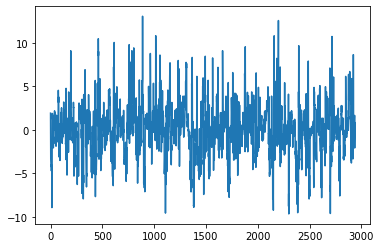

In [513]:
# checking Auto correlation
plt.plot(residuals.index,residuals)

In [465]:
#checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values,i) for i in range(1,X.shape[1])}

{'Year': 1.1252263573049157,
 'Adult Mortality': 1.50768268296935,
 'infant deaths': 129.56253812603032,
 'Alcohol': 1.8673168699423082,
 'percentage expenditure': 1.4615134345831557,
 'Hepatitis B': 2.0930862291392507,
 'Measles ': 1.6396070336021213,
 ' BMI ': 1.8676046483769269,
 'under-five deaths ': 134.38176940124754,
 'Polio': 4.017301276542527,
 'Total expenditure': 1.3603082893274892,
 'Diphtheria ': 4.2217188261536025,
 ' HIV/AIDS': 2.2950369171379768,
 'GDP': 1.2566945037396986,
 ' thinness  1-19 years': 10.367359259508085,
 ' thinness 5-9 years': 10.613867829481013,
 'Income composition of resources': 6.763322370396131,
 'Schooling': 6.0176739038349405,
 'Continents new': 2.1855343994039567,
 'Country new': 1.0576200857393698,
 'Developing ': 1.8844585681398425}

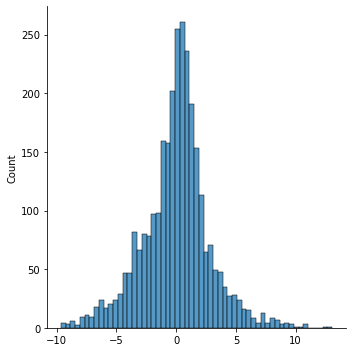

In [466]:
#checking normality assumption
sns.displot(residuals)
plt.show()

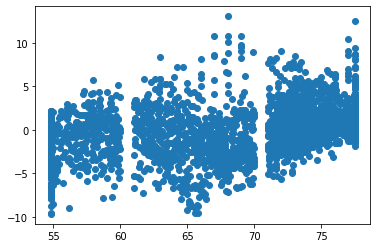

In [467]:
#checking for homoscedaticity assumption
plt.scatter(y,residuals)

# AFTER REMOVING MULTICOLLINEARITY

In [468]:
X=X.drop('infant deaths',axis=1)


In [469]:
X=X.drop(' thinness 5-9 years', axis=1)

In [512]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

C:\Users\muska\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1001.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:10:52   Log-Likelihood:                -7247.3
No. Observations:                2938   AIC:                         1.453e+04
Df Residuals:                    2918   BIC:                         1.465e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -49.5830     26.326     -1.883      0.060    -101.203       2.037
Year                                0.0550      0.013      4.175      0.000       0.029       0.081
Adult Mortality                    -0.0136      0.001    -18.130      0.000      -0.015      -0.012
Alcohol                             0.0281      0.019      1.495      0.135      -0.009       0.065
percentage expenditure              0.0016      0.000      6.800      0.000       0.001       0.002
Hepatitis B                        -0.0055      0.005     -1.070      0.285      -0.016       0.005
Measles                            -0.0001      0.000     -0.540      0.589      -0.000       0.000
 BMI                                0.0106      0.004      2.626      0.009       0.003       0.018
under-five deaths                  -0.0518      0.004    -11.757      0.000      -0.060      -0.043
Polio                               0.0304      0.007      4.296      0.000       0.017       0.044
Total expenditure                   0.0196      0.030      0.649      0.517      -0.040       0.079
Diphtheria                          0.0410      0.007      5.993      0.000       0.028       0.054
 HIV/AIDS                          -4.6314      0.116    -39.859      0.000      -4.859      -4.404
GDP                             -1.069e-05    3.3e-06     -3.244      0.001   -1.72e-05   -4.23e-06
 thinness  1-19 years              -0.0397      0.030     -1.342      0.180      -0.098       0.018
Income composition of resources    14.0064      0.874     16.022      0.000      12.292      15.721
Schooling                          -0.1860      0.050     -3.706      0.000      -0.284      -0.088
Continents new                      0.5339      0.052     10.240      0.000       0.432       0.636
Country new                        -0.0003      0.001     -0.328      0.743      -0.002       0.002
Developing                         -0.7443      0.190     -3.925      0.000      -1.116      -0.373
==============================================================================
Omnibus:                      100.773   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.066
Skew:                           0.080   Prob(JB):                     1.38e-59
Kurtosis:                       4.480   Cond. No.                     1.11e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [470]:
#removing multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values,i) for i in range(1,X.shape[1])}

{'Year': 1.12394281276649,
 'Adult Mortality': 1.498043918497135,
 'Alcohol': 1.849102753218427,
 'percentage expenditure': 1.4518920067201257,
 'Hepatitis B': 2.0913906757189507,
 'Measles ': 1.6343399312341724,
 ' BMI ': 1.8419297226107232,
 'under-five deaths ': 2.187501292798203,
 'Polio': 4.017199453748514,
 'Total expenditure': 1.3509920836288398,
 'Diphtheria ': 4.2141023171389485,
 ' HIV/AIDS': 2.2133463754025406,
 'GDP': 1.253442100242961,
 ' thinness  1-19 years': 2.498714588024541,
 'Income composition of resources': 6.703183448154582,
 'Schooling': 6.012815070517224,
 'Continents new': 2.1311139983474248,
 'Country new': 1.0469976342426668,
 'Developing ': 1.8567889598613216}

# SPLITTING THE DATA INTO TRAIN AND TEST SET

In [471]:
from sklearn.model_selection import train_test_split 

In [472]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [473]:
X_train.shape

(2056, 20)

In [474]:
X_test.shape

(882, 20)

In [475]:
y_train.shape

(2056,)

In [476]:
y_test.shape

(882,)

# FEATURE SCALING

In [477]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.        , -0.09186175, -0.28622762, ...,  2.27386173,
         1.60685187,  0.45994542],
       [ 0.        ,  1.31935439,  1.39003327, ..., -1.06976559,
         1.51785071,  0.45994542],
       [ 0.        , -1.50307789, -1.50850118, ..., -0.40104012,
        -1.2767857 ,  0.45994542],
       ...,
       [ 0.        , -0.32706444,  1.39003327, ..., -1.06976559,
        -1.11658362,  0.45994542],
       [ 0.        ,  1.31935439, -0.76349634, ..., -0.40104012,
        -0.33337341,  0.45994542],
       [ 0.        , -1.50307789,  0.50534003, ...,  0.9364108 ,
        -1.50818872,  0.45994542]])

In [478]:
scaler.transform(X_test)

array([[ 0.        ,  0.14334094,  1.39003327, ..., -1.06976559,
        -0.70717828,  0.45994542],
       [ 0.        , -1.2678752 ,  0.0746341 , ...,  1.60513627,
         1.41104932,  0.45994542],
       [ 0.        , -0.09186175, -1.50850118, ...,  0.9364108 ,
         1.58905164, -2.17417099],
       ...,
       [ 0.        , -0.09186175, -0.29786832, ...,  0.9364108 ,
         0.21843378,  0.45994542],
       [ 0.        ,  0.61374632, -1.31060927, ..., -1.06976559,
         1.33984839,  0.45994542],
       [ 0.        , -1.03267251, -1.25240577, ..., -1.06976559,
         0.50323749,  0.45994542]])

# TRAINING THE MODELS ON TRAINING SET

In [502]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [503]:
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [504]:
y_pred=regressor1.predict(X_test)
comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(comparison)
mse1=mean_squared_error(y_test,y_pred)
r1=r2_score(y_test,regressor1.predict(X_test))
adr1=(1 - (1-regressor1.score(X_train,y_train))*(len(y)-1)/(len(y)-X.shape[1]-1))
linear_train_accuracy=regressor1.score(X_train, y_train)
linear_test_accuracy=regressor1.score(X_test, y_test)


      Actual  Predicted
889     59.8  53.670383
2646    71.9  73.127518
2802    77.5  75.806722
1938    73.6  73.031171
1675    72.9  72.467545
440     54.8  59.416059
773     72.1  72.139401
2621    58.3  60.925995
2709    63.4  65.596775
928     77.5  77.415682
1802    62.4  64.571127
2270    74.4  74.870906
1981    61.6  63.326177
1303    75.0  72.373854
2521    77.5  77.369038
2331    76.1  76.095228
433     54.8  63.012545
676     77.5  78.403298
296     66.5  66.402101
2864    73.6  73.108269
1224    73.3  71.428243
532     54.8  53.298611
121     77.5  78.240998
2733    77.0  73.962883
1875    73.0  69.047148
2427    77.5  78.285300
1297    77.5  75.560248
514     54.8  54.650694
1263    77.4  76.051899
568     74.4  70.339057
1724    65.9  73.819410
2170    74.8  74.151937
1455    73.0  73.634803
1871    71.2  70.196730
1068    69.2  71.078534
2036    66.8  66.429094
1127    54.8  57.550846
1412    77.0  71.059109
1279    77.5  73.883078
961     61.0  58.214922
536     54.8  53

In [505]:
regressor2= DecisionTreeRegressor()
regressor2.fit(X_train, y_train)


DecisionTreeRegressor()

In [506]:
y_pred = regressor2.predict(X_test)
comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(comparison)
mse2=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,regressor2.predict(X_test))
adr2=(1 - (1-regressor2.score(X_train,y_train))*(len(y)-1)/(len(y)-X.shape[1]-1))
decision_train_accuracy=regressor2.score(X_train, y_train)
decision_test_accuracy=regressor2.score(X_test, y_test)



      Actual  Predicted
889     59.8       68.0
2646    71.9       72.2
2802    77.5       77.5
1938    73.6       74.7
1675    72.9       72.1
440     54.8       54.8
773     72.1       71.7
2621    58.3       62.0
2709    63.4       59.8
928     77.5       77.5
1802    62.4       64.7
2270    74.4       74.6
1981    61.6       62.0
1303    75.0       76.0
2521    77.5       77.5
2331    76.1       76.4
433     54.8       59.7
676     77.5       77.5
296     66.5       65.8
2864    73.6       73.2
1224    73.3       73.9
532     54.8       54.8
121     77.5       77.5
2733    77.0       75.1
1875    73.0       66.6
2427    77.5       77.5
1297    77.5       77.5
514     54.8       54.8
1263    77.4       77.5
568     74.4       74.2
1724    65.9       69.5
2170    74.8       75.0
1455    73.0       69.2
1871    71.2       73.0
1068    69.2       65.3
2036    66.8       66.8
1127    54.8       62.5
1412    77.0       72.9
1279    77.5       77.5
961     61.0       59.2
536     54.8    

In [507]:
regressor3= RandomForestRegressor(random_state = 0)
regressor3.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [508]:
y_pred = regressor3.predict(X_test)
comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(comparison)
mse3=mean_squared_error(y_test,y_pred)
r3=r2_score(y_test,regressor3.predict(X_test))
adr3=(1 - (1-regressor3.score(X_train,y_train))*(len(y)-1)/(len(y)-X.shape[1]-1))
random_train_accuracy=regressor3.score(X_train, y_train)
random_test_accuracy=regressor3.score(X_test, y_test)



      Actual  Predicted
889     59.8     58.001
2646    71.9     72.574
2802    77.5     77.484
1938    73.6     74.243
1675    72.9     72.592
440     54.8     55.000
773     72.1     72.419
2621    58.3     59.238
2709    63.4     63.895
928     77.5     77.484
1802    62.4     60.681
2270    74.4     72.477
1981    61.6     62.559
1303    75.0     74.862
2521    77.5     77.500
2331    76.1     76.395
433     54.8     58.660
676     77.5     77.500
296     66.5     64.727
2864    73.6     73.395
1224    73.3     74.575
532     54.8     55.142
121     77.5     77.500
2733    77.0     74.623
1875    73.0     71.364
2427    77.5     77.462
1297    77.5     77.478
514     54.8     56.693
1263    77.4     77.382
568     74.4     74.335
1724    65.9     72.798
2170    74.8     74.737
1455    73.0     71.681
1871    71.2     72.165
1068    69.2     70.247
2036    66.8     66.183
1127    54.8     62.225
1412    77.0     71.392
1279    77.5     77.490
961     61.0     59.556
536     54.8    

In [509]:
regressor4=KNeighborsRegressor()
regressor4.fit(X_train, y_train)


KNeighborsRegressor()

In [510]:
y_pred = regressor4.predict(X_test)
comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(comparison)
mse4=mean_squared_error(y_test,y_pred)
r4=r2_score(y_test,regressor4.predict(X_test))
adr4=(1 - (1-regressor4.score(X_train,y_train))*(len(y)-1)/(len(y)-X.shape[1]-1))
knn_train_accuracy=regressor4.score(X_train, y_train)
knn_test_accuracy=regressor4.score(X_test, y_test)


      Actual  Predicted
889     59.8      57.96
2646    71.9      70.24
2802    77.5      74.52
1938    73.6      73.12
1675    72.9      76.20
440     54.8      56.04
773     72.1      75.02
2621    58.3      59.42
2709    63.4      69.30
928     77.5      77.36
1802    62.4      74.40
2270    74.4      75.74
1981    61.6      66.10
1303    75.0      72.22
2521    77.5      74.66
2331    76.1      75.58
433     54.8      67.72
676     77.5      77.50
296     66.5      72.34
2864    73.6      73.82
1224    73.3      73.40
532     54.8      59.42
121     77.5      77.50
2733    77.0      69.08
1875    73.0      73.32
2427    77.5      70.76
1297    77.5      67.40
514     54.8      56.88
1263    77.4      77.50
568     74.4      69.10
1724    65.9      71.06
2170    74.8      74.54
1455    73.0      68.04
1871    71.2      67.74
1068    69.2      63.40
2036    66.8      64.30
1127    54.8      60.38
1412    77.0      69.90
1279    77.5      76.34
961     61.0      68.46
536     54.8    

In [511]:
data=[["LINEAR_REGRESSION",linear_train_accuracy,linear_test_accuracy,r1,adr1,mse1],["DECISION_TREE_REGRESSION",decision_train_accuracy,decision_test_accuracy,r2,adr2,mse2],["RANDOM_FOREST_REGRESSION",random_train_accuracy,random_test_accuracy,r3,adr3,mse3],["K-NEAREST NEIGHBOUR",knn_train_accuracy,knn_test_accuracy,r4,adr4,mse4]]
df4=pd.DataFrame(data,columns=['NAME','TRAIN ACCURACY','TEST ACCURACY','R2 SCORE','ADJUSTED R2','MEAN_SQUARED_ERROR'])
print(df4)

                       NAME  TRAIN ACCURACY  TEST ACCURACY  R2 SCORE  \
0         LINEAR_REGRESSION        0.867311       0.864708  0.864708   
1  DECISION_TREE_REGRESSION        1.000000       0.914769  0.914769   
2  RANDOM_FOREST_REGRESSION        0.995075       0.959085  0.959085   
3       K-NEAREST NEIGHBOUR        0.792555       0.670008  0.670008   

   ADJUSTED R2  MEAN_SQUARED_ERROR  
0     0.866401            8.566062  
1     1.000000            5.396440  
2     0.995041            2.590572  
3     0.791133           20.893508  


# HYPERPARAMETER TUNING

In [114]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float','None']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse','mae']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', 'None'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [115]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\muska\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.93950058        nan 0.9397132  0.9484497         nan
        nan        nan 0.94743254 0.93899008]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'int', 'float',
                                                         'None'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose

In [116]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

In [117]:
best_random_grid=rf_randomcv.best_estimator_

In [118]:
y_pred1=best_random_grid.predict(X_test)
r5=r2_score(y_test,y_pred1)
mse5=mean_squared_error(y_test,y_pred1)

In [119]:
print(r4)
print(mse4)

0.9512607817814761
3.085936221059079


In [120]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 900,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Create the random grid
param_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}
print(param_grid1)

{'n_estimators': [10, 22, 34, 46, 58, 71, 83, 95, 107, 120], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 108, 207, 306, 405, 504, 603, 702, 801, 900], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'criterion': ['mse']}


In [121]:
rf=RandomForestRegressor()
rf_gridcv=GridSearchCV(estimator=rf,param_grid=param_grid1,cv=2,verbose=2,n_jobs=-1)
### fit the randomized model
rf_gridcv.fit(X_train,y_train)

Fitting 2 folds for each of 800 candidates, totalling 1600 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_depth': [10, 108, 207, 306, 405, 504, 603, 702,
                                       801, 900],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 22, 34, 46, 58, 71, 83, 95, 107,
                                          120]},
             verbose=2)

In [122]:
rf_gridcv.best_estimator_


RandomForestRegressor(max_depth=900, max_features='sqrt', n_estimators=107)

In [123]:
from sklearn.ensemble import RandomForestRegressor
regressor4= RandomForestRegressor(n_estimators =71, random_state = 0, max_depth=603, max_features='sqrt')
regressor4.fit(X_train, y_train)

RandomForestRegressor(max_depth=603, max_features='sqrt', n_estimators=71,
                      random_state=0)

In [124]:
from sklearn.metrics import r2_score
r4=r2_score(y_test,regressor4.predict(X_test))



In [125]:
print(" The R2 score of Random Forest Regression after paramater tuning: ", r4)


 The R2 score of Random Forest Regression after paramater tuning:  0.9572646252737457


In [126]:
data=[["LINEAR_REGRESSION",r1,mse1],["DECISION_TREE_REGRESSION",r2,mse2],["RANDOM_FOREST_REGRESSION",r3,mse3],["RANDOM_FOREST_tuned",r4,mse4]]
df4=pd.DataFrame(data,columns=['NAME','R2 SCORE', 'MEAN_SQUARED_ERROR'])
print(df4)

                       NAME  R2 SCORE  MEAN_SQUARED_ERROR
0         LINEAR_REGRESSION  0.866395            8.459259
1  DECISION_TREE_REGRESSION  0.921914            4.944025
2  RANDOM_FOREST_REGRESSION  0.954996            2.849451
3       RANDOM_FOREST_tuned  0.957265            3.085936


<BarContainer object of 4 artists>

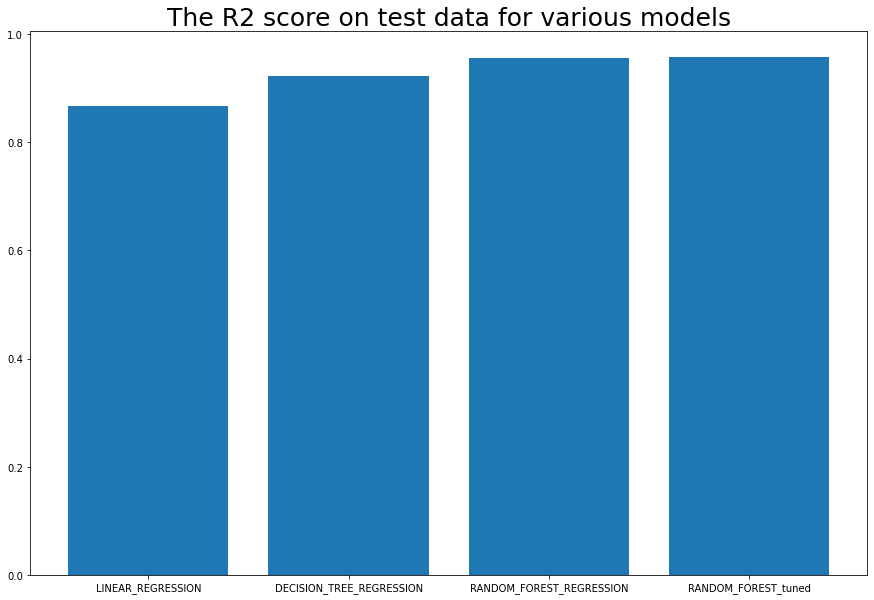

In [127]:
name = df4['NAME']
rmse = df4['MEAN_SQUARED_ERROR']
r2 = df4['R2 SCORE']

fig = plt.figure(figsize =(15, 10))



plt.title("The R2 score on test data for various models", {'fontsize': 25})

plt.bar(name, r2)